<img src="logo-nokia.png" alt="Logo" width="300"/>

# PEOBLEM STATEMENT:
The Global Superstore dataset contains a vast amount of detailed information with numerous complexities. Due to its size and intricacy, it's not feasible to analyze or draw meaningful conclusions just by looking at it. Therefore, we need to process and transform the data to make it more understandable, insightful, and useful.
# SOLUTION:
I developed a solution that involves processing the data through several key steps. First, the data will be cleaned, followed by an in-depth analysis. To enhance efficiency, unnecessary features will be removed. Finally, I will compile a comprehensive report that includes visualizations, detailed explanations, and an overview of the transformed dataset.

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('Sample_Superstore.csv',encoding='latin1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## DATA CLEANING

### We will carry out it in following steps:

1)Checking for missing values, if any we will fill it considering the type of column(eg.for Price we will use mean).  
2)Converting the columns(like if the date is in text format we will convert it.)  
3)Renaming the ambigous columns and dropping the irrevelent features.

In [8]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
(df=='NA').sum()
(df=='NULL').sum()
(df==' ').sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Here we don't have any missing values neither missing nor in the form of string(like "","NULL" etc.)

In [11]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

As we can see here all the columns have correct data type except the Ship Date and Order Date.  
Changing it to datetime:

In [13]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

 Since we have to deal with the data in terms of profit margin and performance of different regions, we don't need the  
 customer related data like customer name, customer id.

In [15]:
df=df.drop('Customer ID',axis=1)
df=df.drop('Customer Name',axis=1)

Now we have a cleaned data that we can use to train our models and can be used directly for our further analysis.

## EDA(Exploratory Data Analysis)

In Exploratory data analysis, I will find the realtionships among features like sales, profit and we will have a more deeper look into data observing trends and the factor on which those trends depends.

In [86]:
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit margin,Profit flag,Sales category
Order Date,,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600,True,Low
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000,True,Low
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,90036,West,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700,True,Low
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000,False,Low
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125,True,Low


In [88]:
df.tail()

,Row ID,Order ID,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit margin,Profit flag,Sales category
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-01-21,9990,CA-2014-110422,2014-01-23,Second Class,Consumer,United States,Miami,Florida,33180,South,...,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028,0.1625,True,Low
2017-02-26,9991,CA-2017-121258,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332,0.1700,True,Low
2017-02-26,9992,CA-2017-121258,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,...,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932,0.0750,True,Low
2017-02-26,9993,CA-2017-121258,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200,0.4500,True,Low
2017-05-04,9994,CA-2017-119914,2017-05-09,Second Class,Consumer,United States,Westminster,California,92683,West,...,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480,0.3000,True,Low


In [92]:
df.shape

(9994, 21)

In [19]:
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,NaN,NaN,4,3,1,531,49,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,NaN,Standard Class,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,5968,5191,9994,915,2001,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
min,1.000000,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,2015-05-23 00:00:00,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,2016-06-26 00:00:00,2016-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,2017-05-14 00:00:00,2017-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000
max,9994.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,99301.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000


In [20]:
df.describe(include="object")

,Order ID,Ship Mode,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,5191,9994,915,2001,3203,19,6026,1523,48


Here we got informations like mean, min, max and quartiles of the data which will eventually help us to identify central tendency, possible outliers and outliers distribution.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Ship Date     9994 non-null   datetime64[ns]
 4   Ship Mode     9994 non-null   object        
 5   Segment       9994 non-null   object        
 6   Country       9994 non-null   object        
 7   City          9994 non-null   object        
 8   State         9994 non-null   object        
 9   Postal Code   9994 non-null   int64         
 10  Region        9994 non-null   object        
 11  Product ID    9994 non-null   object        
 12  Category      9994 non-null   object        
 13  Sub-Category  9994 non-null   object        
 14  Product Name  9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [23]:
df.value_counts()

Row ID  Order ID        Order Date  Ship Date   Ship Mode       Segment      Country        City         State          Postal Code  Region   Product ID       Category         Sub-Category  Product Name                                                               Sales    Quantity  Discount  Profit   
1       CA-2016-152156  2016-11-08  2016-11-11  Second Class    Consumer     United States  Henderson    Kentucky       42420        South    FUR-BO-10001798  Furniture        Bookcases     Bush Somerset Collection Bookcase                                          261.960  2         0.0        41.9136     1
6666    CA-2016-115483  2016-07-14  2016-07-18  Second Class    Consumer     United States  Irving       Texas          75061        Central  OFF-PA-10001497  Office Supplies  Paper         Xerox 1914                                                                 219.840  5         0.2        79.6920     1
6659    CA-2017-135937  2017-02-20  2017-02-27  Standard Class  Home Office  U

In [24]:
print(df.groupby("Region")['Sales'].sum().sort_values())
print(df.groupby("Region")['Sales'].mean().sort_values())

Region
South      391721.9050
Central    501239.8908
East       678781.2400
West       725457.8245
Name: Sales, dtype: float64
Region
Central    215.772661
West       226.493233
East       238.336110
South      241.803645
Name: Sales, dtype: float64


In [25]:
print(df.groupby("State")["Profit"].sum().sort_values(ascending=True))
print(df.groupby("State")["Profit"].mean().sort_values(ascending=True))

State
Texas                  -25729.3563
Ohio                   -16971.3766
Pennsylvania           -15559.9603
Illinois               -12607.8870
North Carolina          -7490.9122
Colorado                -6527.8579
Tennessee               -5341.6936
Arizona                 -3427.9246
Florida                 -3399.3017
Oregon                  -1190.4705
Wyoming                   100.1960
West Virginia             185.9216
North Dakota              230.1497
South Dakota              394.8283
Maine                     454.4862
Idaho                     826.7231
Kansas                    836.4435
District of Columbia     1059.5893
New Mexico               1157.1161
Iowa                     1183.8119
New Hampshire            1706.5028
South Carolina           1769.0566
Montana                  1833.3285
Nebraska                 2037.0942
Louisiana                2196.1023
Vermont                  2244.9783
Utah                     2546.5335
Mississippi              3172.9762
Nevada        

In [26]:
print(df.groupby("Category")["Profit"].sum().sort_values(ascending=True))
print(df.groupby("Category")["Profit"].mean().sort_values(ascending=True))

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64
Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64


Here, in the categorical comparison we have a clear category i.e Technology which is highest performing since it has both highest profit and high mean or average profit

In [28]:
print(df.groupby("Sub-Category")["Profit"].mean().sort_values(ascending=True))

Sub-Category
Tables         -55.565771
Bookcases      -15.230509
Supplies        -6.258418
Fasteners        4.375660
Art              8.200737
Furnishings     13.645918
Labels          15.236962
Binders         19.843574
Paper           24.856620
Storage         25.152277
Envelopes       27.418019
Machines        29.432669
Appliances      38.922758
Chairs          43.095894
Phones          50.073938
Accessories     54.111788
Copiers        817.909190
Name: Profit, dtype: float64


In [29]:
print(df.groupby("Segment")["Sales"].sum().sort_values())

Segment
Home Office    4.296531e+05
Corporate      7.061464e+05
Consumer       1.161401e+06
Name: Sales, dtype: float64


## Time based resampling

In [31]:
df.set_index(["Order Date"],inplace=True)

 Monthly total sale

In [33]:
M=df['Sales'].resample("ME").sum()
M

Order Date
2014-01-31     14236.8950
2014-02-28      4519.8920
2014-03-31     55691.0090
2014-04-30     28295.3450
2014-05-31     23648.2870
2014-06-30     34595.1276
2014-07-31     33946.3930
2014-08-31     27909.4685
2014-09-30     81777.3508
2014-10-31     31453.3930
2014-11-30     78628.7167
2014-12-31     69545.6205
2015-01-31     18174.0756
2015-02-28     11951.4110
2015-03-31     38726.2520
2015-04-30     34195.2085
2015-05-31     30131.6865
2015-06-30     24797.2920
2015-07-31     28765.3250
2015-08-31     36898.3322
2015-09-30     64595.9180
2015-10-31     31404.9235
2015-11-30     75972.5635
2015-12-31     74919.5212
2016-01-31     18542.4910
2016-02-29     22978.8150
2016-03-31     51715.8750
2016-04-30     38750.0390
2016-05-31     56987.7280
2016-06-30     40344.5340
2016-07-31     39261.9630
2016-08-31     31115.3743
2016-09-30     73410.0249
2016-10-31     59687.7450
2016-11-30     79411.9658
2016-12-31     96999.0430
2017-01-31     43971.3740
2017-02-28     20301.1334
2

Weekly average profit:

In [35]:
df["Profit"].resample("W").mean()

Order Date
2014-01-05   -11.110980
2014-01-12    82.671462
2014-01-19    18.131195
2014-01-26    26.139231
2014-02-02    21.776973
                ...    
2017-12-03    16.013970
2017-12-10     8.390592
2017-12-17     9.856660
2017-12-24    42.883730
2017-12-31    20.707991
Freq: W-SUN, Name: Profit, Length: 209, dtype: float64

Daily average sale:

In [37]:
df["Sales"].resample("D").mean()

Order Date
2014-01-03     16.448000
2014-01-04     96.020000
2014-01-05     19.536000
2014-01-06    489.677778
2014-01-07     43.579000
                 ...    
2017-12-26    203.648500
2017-12-27     88.818000
2017-12-28     87.228989
2017-12-29    242.961167
2017-12-30    101.970000
Freq: D, Name: Sales, Length: 1458, dtype: float64

With Time-based resampling we can study the data efficiently as we can see the weekly, monthly, quarterly and yearly data too and can also visualise it:

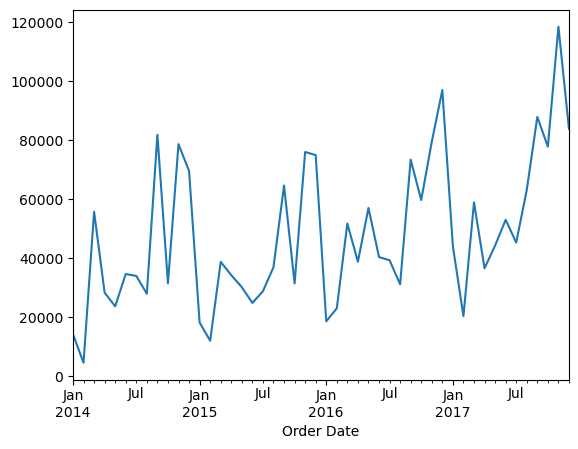

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
M.plot()
plt.show()

## Feature Engineering

Checking for outliers:


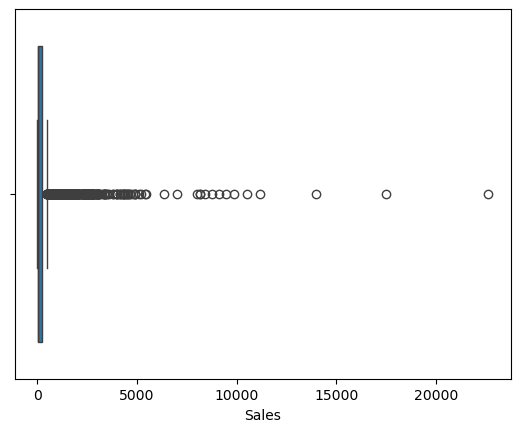

In [42]:
import seaborn as sns
sns.boxplot(x=df["Sales"])
plt.show()

 Dots far right are the outliers...

In [44]:
Q1=df.Sales.quantile(0.25)
Q3=df.Sales.quantile(0.75)
IQR=Q3-Q1
IQR

192.66

In [45]:
lowerlimit=Q1-IQR*1.5
upperlimit=Q3+IQR*1.5
lowerlimit,upperlimit

(-271.71000000000004, 498.93)

In [46]:
df[(df.Sales<lowerlimit)|(df.Sales>lowerlimit)]

,Row ID,Order ID,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-21,9990,CA-2014-110422,2014-01-23,Second Class,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2017-02-26,9991,CA-2017-121258,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
2017-02-26,9992,CA-2017-121258,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


In [47]:
df_no_outlier=df[(df.Sales<lowerlimit)&(df.Sales>lowerlimit)]

In [48]:
df_no_outlier

,Row ID,Order ID,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,


This data has no values inside the box along with all the values are outliers here that depicts:

1) All the values are either smaller than first quartile or grater than third quartile.
2) The dataset consists of reapeted values and lacks variability.
3) From data point of view, there is almost no variability of sales in all the states.

## Adding columns for our further analysis: 

In [51]:
df['Profit margin']=df['Profit']/df['Sales']

In [52]:
df['Profit flag']=df['Profit'].apply(lambda x: True if x>0 else False)

In [53]:
df["Sales category"]=df['Sales'].apply(lambda x:'Low' if x<=1000 else 'Medium' if 1000>x>4000 else 'High')

In [54]:
df

,Row ID,Order ID,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit margin,Profit flag,Sales category
Order Date,,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600,True,Low
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000,True,Low
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,90036,West,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700,True,Low
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000,False,Low
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125,True,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-21,9990,CA-2014-110422,2014-01-23,Second Class,Consumer,United States,Miami,Florida,33180,South,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,0.1625,True,Low
2017-02-26,9991,CA-2017-121258,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,0.1700,True,Low
2017-02-26,9992,CA-2017-121258,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,...,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,0.0750,True,Low


Here we got more meaningful and relaible data...

## DATA VISUALIZATION AND ANALYSIS

Category wise sales and profit:


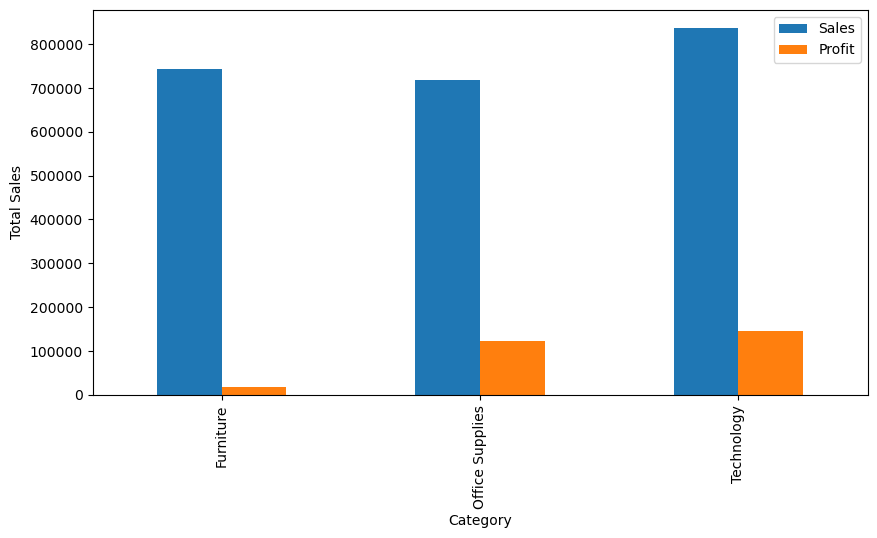

In [94]:
# plt.close('all')
category_data=df.groupby('Category')[['Sales','Profit']].sum()
category_data.plot(kind='bar',figsize=(10,5))
plt.ylabel('Total Sales')
plt.savefig("sample_plot.png")
plt.show()

This graph help us getting a better view of the data in terms of profit. 

Analysis: Technology sector has the largest sales, profit and profit per sales.

Sales over the time:

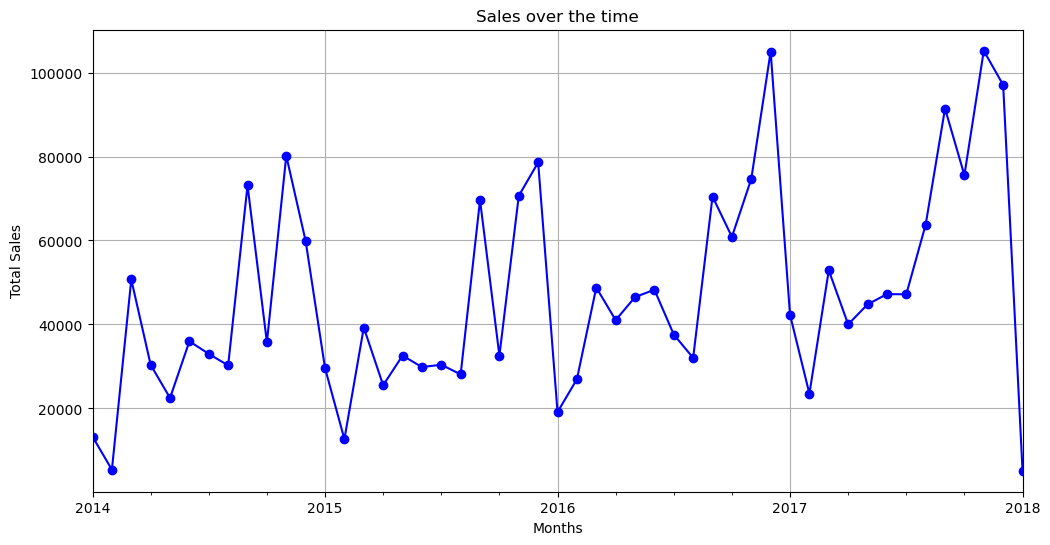

In [96]:
plt.close('all')
plt.figure(figsize=(12,6))
df['Ship Date']=pd.to_datetime(df['Ship Date'])
monthly_sales= df.groupby(df['Ship Date'].dt.to_period('M'))['Sales'].sum()

monthly_sales.plot(kind="line",marker='o',color='b')
plt.xlabel('Months')
plt.ylabel('Total Sales')
# plt.title = getattr(plt, "title")
plt.title("Sales over the time")
plt.savefig("sample_plot2.png")
plt.grid(True)
plt.show()

In the above visualization we can clearly see the our sales was very fluctuating and after 2017 there was a very steep downfall but in 2018 specifically our sales gone to the lowest.

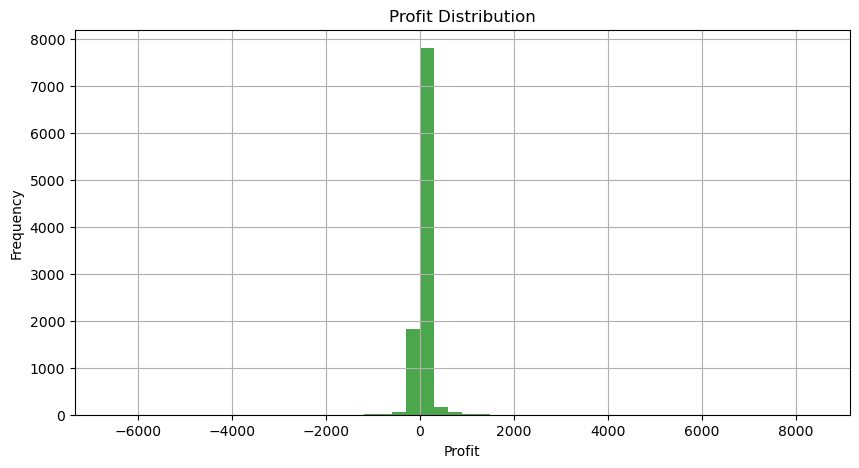

In [63]:
plt.close('all')
import matplotlib.pyplot as plt 
import numpy as np
plt.figure(figsize=(10,5))
plt.hist(df['Profit'], bins=50, color='green', alpha=0.7)
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.title("Profit Distribution")
plt.grid(True)
plt.show()

This is how the profit is distributed.

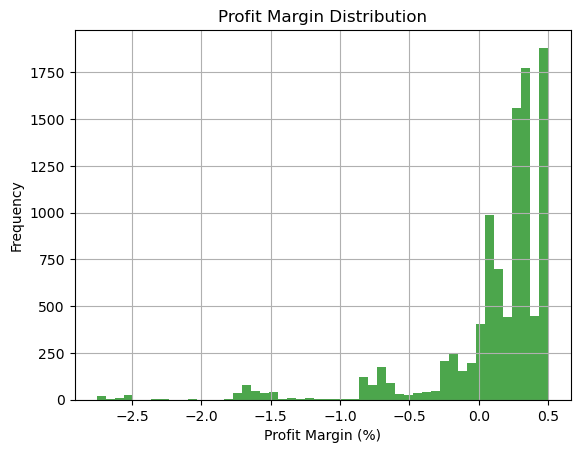

In [65]:
profit_margin_trend = df.groupby(df.index.to_period("M"))['Profit margin'].mean()
plt.hist(df['Profit margin'], bins=50, color='green', alpha=0.7)
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.title("Profit Margin Distribution")
plt.grid(True)
plt.show()


The above distribution depicts that we have a good frequency on our products having more profit matgin.

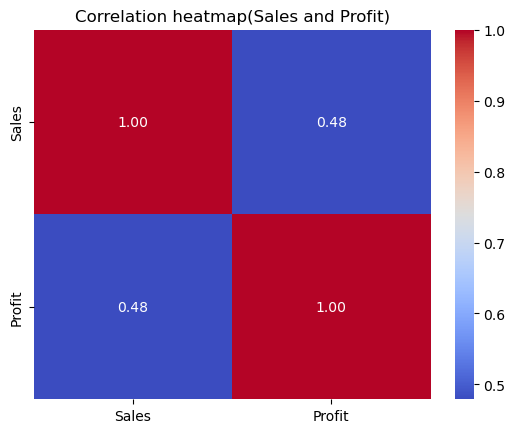

In [102]:
sns.heatmap(df[['Sales', 'Profit']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation heatmap(Sales and Profit)')
plt.savefig("sample_plot4.png")
plt.show()

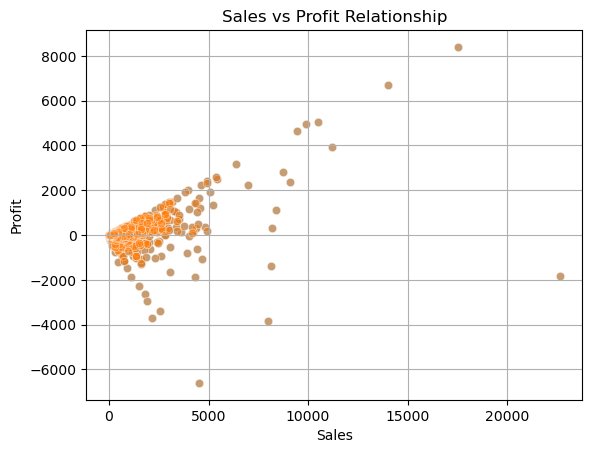

In [100]:
sns.scatterplot(x=df['Sales'], y=df['Profit'], alpha=0.5)

plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales vs Profit Relationship")
plt.grid(True)
plt.savefig("sample_plot3.png")
plt.show()

Here, in the above scatterplot we can see sales and profit is that might be seen as profit and sales are highly correlated. Since this is a business data so we can say dense clusters may reveal common transaction behaviors, like frequent discounts leading to similar profit outcomes.

# Final Analysis and Insights

Here is my detailed insights point by point:
1) The data reveals a strong correlation between Profit and Sales. A high profit margin is prevalent, indicating robust business performance with many products being sold at favorable prices. However, there are instances of negative margins, highlighting that some products were sold at a loss.

2) Analyzing sales trends over time, we observe significant fluctuations. Sales showed a steady upward trend until the end of 2017, followed by a sharp decline. The early months of 2018 represent the lowest sales period in the dataset.

3) Among all categories, the Technology segment stands out, delivering the highest profit margin compared to the other two categories.


Some final steps:



In [73]:
#Saving the cleaned dataset:
df.to_csv('Cleaned data.csv')

In [83]:
#merging two datasets[sample_superstore.csv and GDP.csv]
import pandas as pd
df1=df
dfnew=pd.read_csv('GDP.csv')
dfnew['Index'] = range(1, len(df) + 1)
df1['Index'] = range(1, len(df) + 1)
df_merged = pd.merge(df1, dfnew, on="common_column", how="outer")

ValueError: Length of values (9994) does not match length of index (120)